# Stock Prices Exploratory Data Analysis

In this data project I focus on exploratory data analysis of stock prices of various banks from the year 2006 to 2016. This project is just meant to practice my visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
I focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [23]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader.data as web
import seaborn as sns
%matplotlib inline

## Data

I get data using pandas datareader. I will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [3]:

start = dt.datetime(2006, 1, 1)
end = dt.datetime(2016, 1, 1)

In [52]:
BAC = web.DataReader('BAC', 'stooq', start, end)

In [5]:
BAC.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,14.7814,14.8325,14.6233,14.6233,5.417059e+07
2015-12-30,14.9473,14.9807,14.8070,14.8168,4.030734e+07
2015-12-29,14.9897,15.0780,14.9130,15.0131,5.251059e+07
2015-12-28,14.9630,14.9720,14.7539,14.8846,4.803435e+07
2015-12-24,15.0495,15.1035,14.9630,15.0063,3.380344e+07


In [6]:
# Citi Group
C = web.DataReader('C', 'stooq', start, end)
#Goldman Sachs
GS = web.DataReader('GS', 'stooq', start, end)
# JP Morgan
JPM = web.DataReader('JPM', 'stooq', start, end)
# Morgan Stanley
MS = web.DataReader('MS', 'stooq', start, end)
# Wells Fargo
WFC = web.DataReader('WFC', 'stooq', start, end)

In [7]:
C.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,43.3773,43.6426,43.1101,43.1101,1.353052e+07
2015-12-30,44.0205,44.1027,43.5291,43.5692,1.051787e+07
2015-12-29,43.9520,44.3357,43.9344,44.1369,1.218830e+07
2015-12-28,43.7934,43.7934,43.2863,43.6347,1.051593e+07
2015-12-24,43.7209,44.1281,43.6954,43.9089,5.607320e+06


** Create a list of the ticker symbols (as strings) in alphabetical order.

In [8]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Concatenate the bank dataframes together to a single data frame called bank_stocks:

In [9]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

In [10]:
bank_stocks

BAC                                                  C  \
               Open     High      Low    Close        Volume      Open   
Date                                                                     
2006-01-03  39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.4920   
2006-01-04  39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.3580   
2006-01-05  39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.8430   
2006-01-06  39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.5040   
2006-01-09  39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.1740   
...             ...      ...      ...      ...           ...       ...   
2015-12-24  15.0495  15.1035  14.9630  15.0063  3.380344e+07   43.7209   
2015-12-28  14.9630  14.9720  14.7539  14.8846  4.803435e+07   43.7934   
2015-12-29  14.9897  15.0780  14.9130  15.0131  5.251059e+07   43.9520   
2015-12-30  14.9473  14.9807  14.8070  14.8168  4.030734e+07   44.0205   
2015-12-31  14.7814  14.8325  14.6233  14.6233  5.417059e+07   43.3773   

                                                        ...       MS           \
                High       Low     Close        Volume  ...     Open     High   
Date                                                    ...                     
2006-01-03  408.6150  398.1120  407.8910  1.858097e+06  ...  37.4934  38.3558   
2006-01-04  406.3250  400.0890  400.3540  2.260921e+06  ...  38.4971  38.8778   
2006-01-05  403.6630  400.5200  402.3210  1.371893e+06  ...  38.2675  38.4264   
2006-01-06  404.6410  398.8650  402.3210  1.655812e+06  ...  38.5432  38.5922   
2006-01-09  403.3290  399.6780  400.4320  2.031072e+06  ...  38.4470  38.8846   
...              ...       ...       ...           ...  ...      ...      ...   
2015-12-24   44.1281   43.6954   43.9089  5.607320e+06  ...  27.1547  27.2734   
2015-12-28   43.7934   43.2863   43.6347  1.051593e+07  ...  26.9820  26.9820   
2015-12-29   44.3357   43.9344   44.1369  1.218830e+07  ...  27.0448  27.2656   
2015-12-30   44.1027   43.5291   43.5692  1.051787e+07  ...  27.0998  27.2194   
2015-12-31   43.6426   43.1101   43.1101  1.353052e+07  ...  26.6023  26.9300   

                                                WFC                    \
                Low    Close        Volume     Open     High      Low   
Date                                                                    
2006-01-03  37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04  38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05  38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06  38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09  38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   
...             ...      ...           ...      ...      ...      ...   
2015-12-24  27.0448  27.0811  3.356089e+06  44.8298  44.9264  44.6176   
2015-12-28  26.6377  26.8211  6.501028e+06  44.4854  44.6739  44.1775   
2015-12-29  26.9506  27.1380  7.661993e+06  44.9422  45.1396  44.8466   
2015-12-30  26.8476  26.8721  6.065510e+06  45.0735  45.1061  44.6847   
2015-12-31  26.4865  26.5229  9.773893e+06  44.4568  44.8130  44.2159   

                                   
              Close        Volume  
Date                               
2006-01-03  22.9581  1.530724e+07  
2006-01-04  22.6917  1.510382e+07  
2006-01-05  22.6690  1.407726e+07  
2006-01-06  22.7983  1.167705e+07  
2006-01-09  22.7983  7.808415e+06  
...             ...           ...  
2015-12-24  44.7054  6.130267e+06  
2015-12-28  44.5949  1.016352e+07  
2015-12-29  45.0893  9.680671e+06  
2015-12-30  44.7636  9.830145e+06  
2015-12-31  44.3324  1.340161e+07  

[2517 rows x 30 columns]

** Set the column name levels:**

In [11]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [12]:
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04   39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05   39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06   39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09   39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04   406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05   403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06   404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09   403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04   38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05   38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06   38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09   38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   22.9581  1.530724e+07  
2006-01-04   22.6917  1.510382e+07  
2006-01-05   22.6690  1.407726e+07  
2006-01-06   22.7983  1.167705e+07  
2006-01-09   22.7983  7.808415e+06  

[5 rows x 30 columns]

# EDA

** Get the max Close price for each bank's stock throughout the time period: **

In [13]:
bank_stocks.xs(key='Close', axis = 1, level='Stock Info').max()

Bank Ticker
BAC     46.2013
C      466.8120
GS     203.6910
JPM     57.1634
MS      58.5624
WFC     47.0925
dtype: float64

** Create a new empty DataFrame called returns which will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [14]:
returns = pd.DataFrame()

** Create a column representing this return value **

In [15]:
for tick in tickers:
    returns[tick + " Return"] = bank_stocks[tick]['Close'].pct_change(fill_method=None)

In [16]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000


In [61]:
returns.loc[:, :] = returns.replace([np.inf, -np.inf], np.nan)

In [62]:
returns

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000
...,...,...,...,...,...,...
2015-12-24,-0.004101,0.001453,-0.002507,-0.001915,-0.003609,-0.004024
2015-12-28,-0.008110,-0.006245,-0.004702,-0.003286,-0.009601,-0.002472
2015-12-29,0.008633,0.011509,0.010432,0.010303,0.011815,0.011086


** Create a pairplot of the returns dataframe

In [63]:
import seaborn as sns

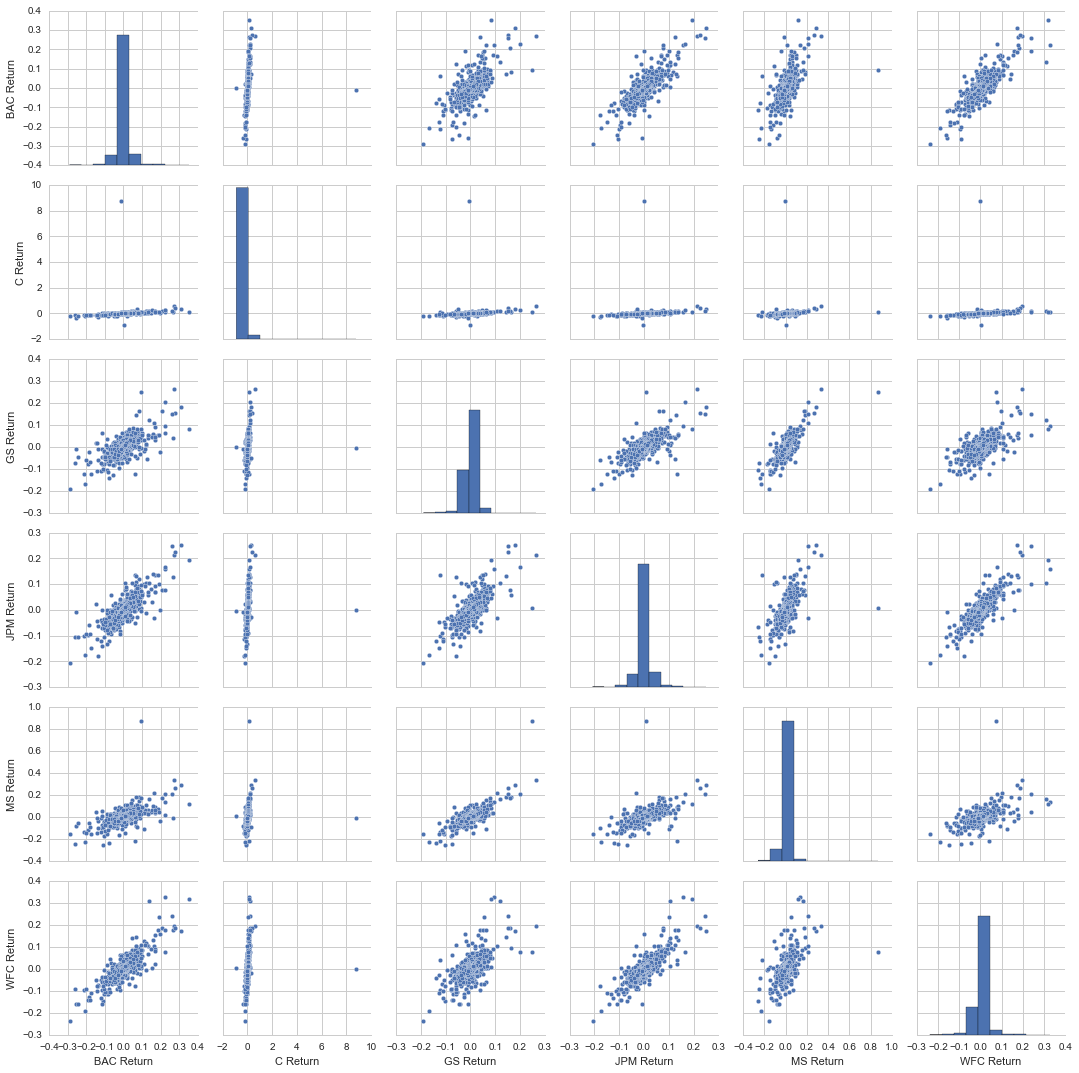

In [68]:
sns.pairplot(returns[1:])

#### There is a weird straight line along the Citigroup Returns and that is because of a huge crash in their stock prices during the 2008-2009 financial crisis

** Get the dates on which each bank stock had the best and worst single day returns

In [75]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

#### The 4 worst drops happen on the 20th January, 2009 and that is because it was the day Barack Obama was sworn in as the President of the USA. Maybe, the stocks crashed because of a big change. However, JP Morgan had the maximum return on the very next day. So, not sure if the stock market crash had any political side to it. The stock market can simply behave weird at times.

In [76]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

#### Citigroup's largest drop and biggest gain were very close to one another because Citigroup announced Reverse Stock Split in May 2011 which reinstated its stock prices.

In [81]:
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

#### The Citi group stocks are the riskiest because of the high standard deviation. That is a result of the huge crash in 2008

In [21]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016149
C Return      0.015280
GS Return     0.014028
JPM Return    0.013964
MS Return     0.016006
WFC Return    0.012545
dtype: float64

#### In 2015, which is well beyond the financial crisis in 2008, all the stocks had almost the same risk. 

** Create a distplot of the 2015 returns for Morgan Stanley **

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


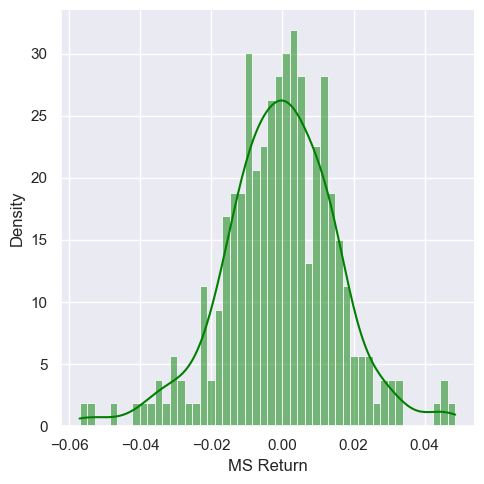

In [31]:
sns.set_theme()
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='green', bins=50, kde=True, stat="density")

** Create a distplot of the 2008 returns for CitiGroup **

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


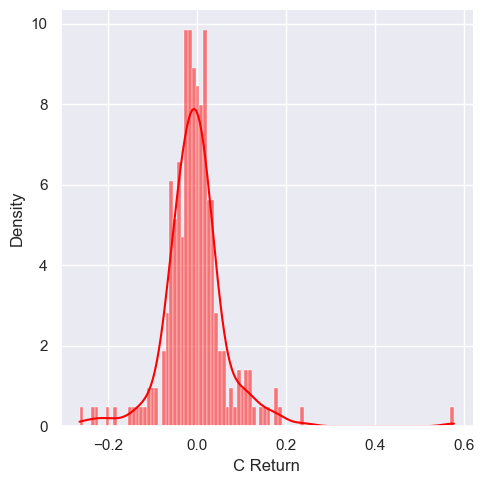

In [34]:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color='red', bins=100, kde=True, stat='density')

____
# More Visualization

In [36]:
pip install cufflinks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.7/81.7 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


  Using cached fqdn-1.5.1-py3-none-any.whl.metadata (1.4 kB)
  Using cached isoduration-20.11.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached uri_template-1.3.0-py3-none-any.whl.metadata (8.8 kB)
Using cached fqdn-1.5.1-py3-none-any.whl (9.1 kB)
Using cached isoduration-20.11.0-py3-none-any.whl (11 kB)
Using cached uri_template-1.3.0-py3-none-any.whl (11 kB)
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67900 sha256=5575a101fbece31d408f40e56c3cc9fca598ec3511b1a78522ecd0ff899e54c3
  Stored in directory: /Users/anisha/Library/Caches/pip/wheels/c3/bf/8f/afa0730b29e347e8c1071049f89748c1262e7a14a838820ae6
Successfully built cufflinks


Note: you may need to restart the kernel to use updated packages.


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time

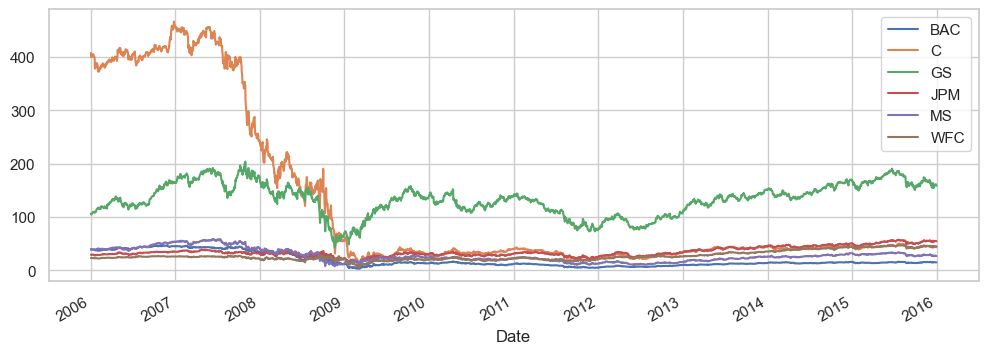

In [38]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick, figsize=(12,4))
plt.legend()

#### Getting the same plot as above but using cross-section or .xs

<Axes: xlabel='Date'>

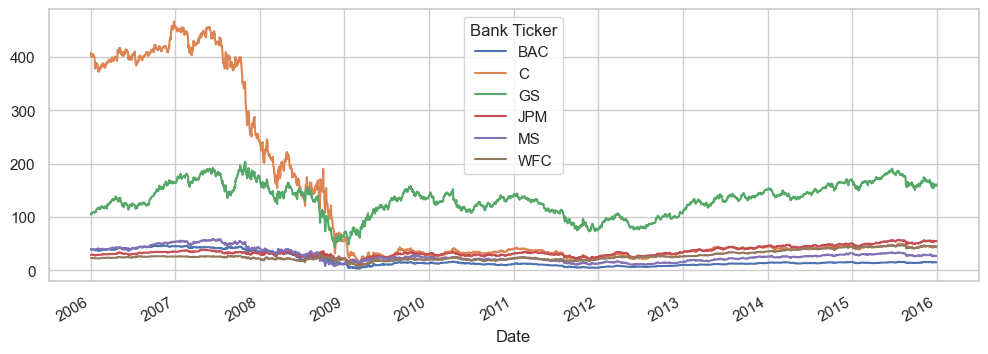

In [46]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot(figsize=(12, 4))

#### Plot the same plot above using plotly

In [47]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()

## Moving Averages

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

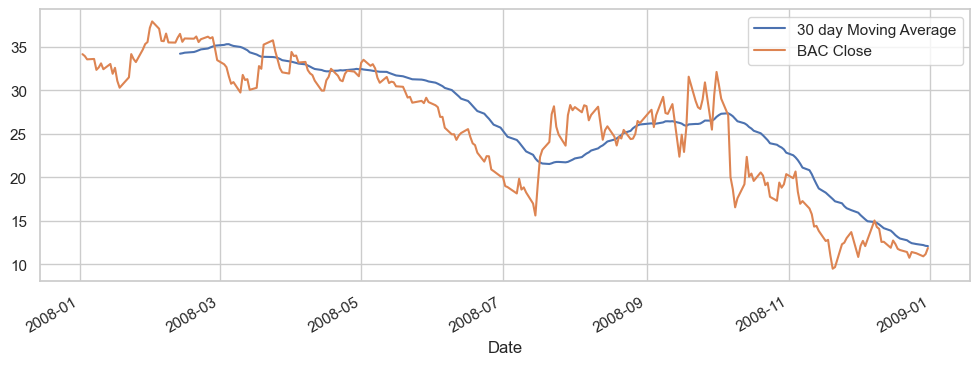

In [57]:
plt.figure(figsize=(12,4))
BAC = BAC.sort_index()
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Moving Average')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

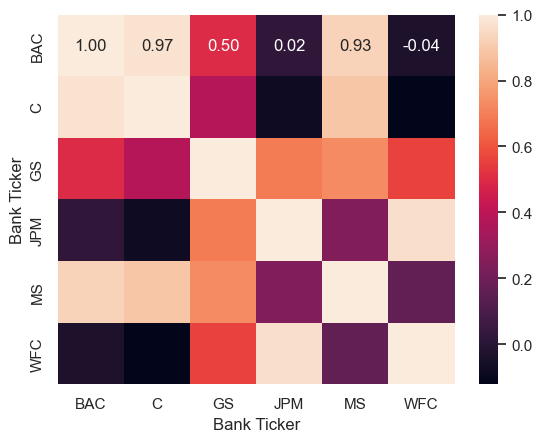

In [63]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True, fmt=".2f")

** Create a clustermap to cluster the correlations together:**

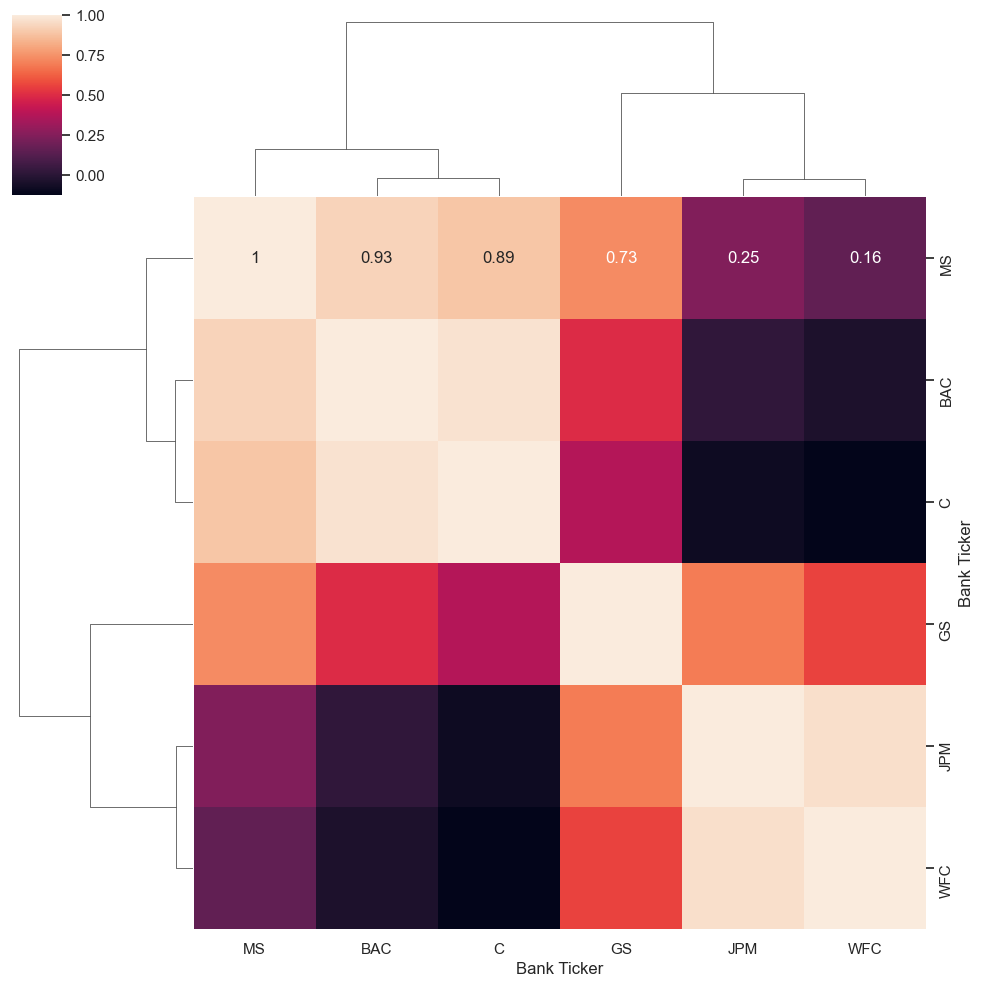

In [62]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

#### Create the above heatmap using plotly

In [64]:
close_corr = bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()

In [65]:
close_corr

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.970862,0.499725,0.019835,0.927576,-0.038152
C,0.970862,1.000000,0.376065,-0.081897,0.888668,-0.121581
GS,0.499725,0.376065,1.000000,0.691696,0.729949,0.557882
JPM,0.019835,-0.081897,0.691696,1.000000,0.245861,0.961907
MS,0.927576,0.888668,0.729949,0.245861,1.000000,0.159574
WFC,-0.038152,-0.121581,0.557882,0.961907,0.159574,1.000000


In [67]:
close_corr.iplot(kind='heatmap', colorscale='rdylbu')

# Part 2 

In this second part of the project, I use the cufflinks library to create some Technical Analysis plots

** Create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [68]:
bac15 = BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01']
bac15.iplot(kind='candle')

** Create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [70]:
MS = MS.sort_index()
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma', periods=[13,21,55])

**Create a Bollinger Band Plot for Bank of America for the year 2015.**

In [71]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')